In [1]:
import os

In [2]:
os.chdir('F:\\Library\\Analytics Path\\02-R\\02-R DataSets\\K means Clustering')

In [3]:
import pandas as pd

In [4]:
churnData = pd.read_csv('Churn Data.csv')

In [5]:
churnData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
del churnData['state']

In [7]:
del churnData['account length']

In [8]:
del churnData['phone number']

In [9]:
churnData.head()

,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
churnData.shape

(3333, 18)

In [11]:
churnData['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [12]:
for i in range(len(churnData['customer service calls'])):
    if churnData['customer service calls'][i]>3:
        churnData['customer service calls'][i] = '>3'


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
churnData.head()

,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
churnData['customer service calls'].value_counts()

1     1181
2      759
0      697
3      429
>3     267
Name: customer service calls, dtype: int64

In [15]:
churnData.dtypes

area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls     object
churn                        bool
dtype: object

In [16]:
churnData.dtypes

area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls     object
churn                        bool
dtype: object

In [17]:
colsToObject = ['area code','churn']

In [18]:
for i in colsToObject:
    churnData[i] = churnData[i].astype('O')

In [19]:
churnData.dtypes

area code                  object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls     object
churn                      object
dtype: object

In [20]:
colsToDummy = []
for i in churnData.columns:
    if churnData[i].dtype == 'O':
        colsToDummy.append(i)
        

In [21]:
churnData['area code'].dtype

dtype('O')

In [22]:
colsToDummy

['area code',
 'international plan',
 'voice mail plan',
 'customer service calls',
 'churn']

In [23]:
dummied_cols = pd.get_dummies(churnData[colsToDummy])

In [24]:
dummied_cols.head()

,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,customer service calls_0,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_>3,churn_False,churn_True
0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
1,0,1,0,1,0,0,1,0,1,0,0,0,1,0
2,0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,1,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,1,0,0,1,1,0,0,0,0,1,0,1,0


In [25]:
dummied_cols.columns

Index(['area code_408', 'area code_415', 'area code_510',
       'international plan_no', 'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes', 'customer service calls_0',
       'customer service calls_1', 'customer service calls_2',
       'customer service calls_3', 'customer service calls_>3', 'churn_False',
       'churn_True'],
      dtype='object')

In [26]:
del dummied_cols['area code_510']

In [27]:
del dummied_cols['international plan_no']

In [28]:
del dummied_cols['voice mail plan_no']

In [29]:
del dummied_cols['customer service calls_0']

In [30]:
del dummied_cols['churn_False']

In [31]:
dummied_cols.head()

,area code_408,area code_415,international plan_yes,voice mail plan_yes,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_>3,churn_True
0,0,1,0,1,1,0,0,0,0
1,0,1,0,1,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,0


In [32]:
churnData = churnData.drop(colsToDummy,axis = 1)

In [33]:
churnData = churnData.join(dummied_cols)

In [34]:
churnData.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,...,total intl charge,area code_408,area code_415,international plan_yes,voice mail plan_yes,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_>3,churn_True
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,...,2.70,0,1,0,1,1,0,0,0,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,...,3.70,0,1,0,1,1,0,0,0,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,...,3.29,0,1,0,0,0,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,...,1.78,1,0,1,0,0,1,0,0,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,...,2.73,0,1,1,0,0,0,1,0,0


In [35]:
X = churnData.iloc[:,0:21]

In [36]:
y = churnData.iloc[:,21]

In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_True, dtype: uint8

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 2017)

In [41]:
from sklearn.ensemble import BaggingClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
?BaggingClassifier

In [44]:
bag1 = BaggingClassifier(n_estimators = 100,random_state = 0)

In [46]:
bag1 = bag1.fit(X_train,y_train)

In [47]:
bag1_pred_test = bag1.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
bag1_pred_train = bag1.predict(X_train)

In [50]:
confusion_matrix(y_test,bag1_pred_test)

array([[700,  11],
       [ 39,  84]], dtype=int64)

In [51]:
84/(84+39)

0.6829268292682927

In [52]:
confusiobag1 = BaggingClassifier(n_estimators = 100,random_state = 0)

array([[2139,    0],
       [   0,  360]], dtype=int64)

In [53]:
1

1

In [54]:
#Overfitting

In [55]:
bag2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth= 5),n_estimators = 100,random_state = 0)

In [56]:
bag2 = bag2.fit(X_train,y_train)

In [57]:
bag2_pred_test = bag2.predict(X_test)

In [58]:
bag2_pred_train = bag2.predict(X_train)

In [59]:
confusion_matrix(y_test,bag2_pred_test)

array([[699,  12],
       [ 46,  77]], dtype=int64)

In [60]:
77/(77+46)

0.6260162601626016

In [61]:
confusion_matrix(y_train,bag2_pred_train)

array([[2131,    8],
       [  87,  273]], dtype=int64)

In [62]:
273/(273+87)

0.7583333333333333

In [63]:
#Still overfitting and recall has gone down. Lets try RandomForest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
?RandomForestClassifier

In [66]:
X_train.shape

(2499, 21)

In [67]:
rf1 = RandomForestClassifier(n_estimators = 100,max_features = 5)

In [68]:
rf1 = rf1.fit(X_train,y_train)

In [69]:
rf1_pred_test = rf1.predict(X_test)

In [70]:
rf1_pred_train = rf1.predict(X_train)

In [71]:
confusion_matrix(y_test,rf1_pred_test)

array([[700,  11],
       [ 39,  84]], dtype=int64)

In [72]:
84/(84+39)

0.6829268292682927

In [73]:
confusion_matrix(y_train,rf1_pred_train)

array([[2139,    0],
       [   0,  360]], dtype=int64)

In [74]:
1

1

In [75]:
#Overfitting

In [76]:
rf2 = RandomForestClassifier(max_depth = 5,n_estimators = 100,max_features = 5)

In [77]:
rf2 = rf2.fit(X_train,y_train)

In [78]:
rf2_pred_test = rf2.predict(X_test)

In [79]:
rf2_pred_train = rf2.predict(X_train)

In [80]:
confusion_matrix(y_test,rf2_pred_test)

array([[701,  10],
       [ 73,  50]], dtype=int64)

In [81]:
50/(50+73)

0.4065040650406504

In [82]:
confusion_matrix(y_train,rf2_pred_train)

array([[2139,    0],
       [ 148,  212]], dtype=int64)

In [83]:
212/(212+148)

0.5888888888888889

In [84]:
#Both overfitting and recall has reduced

In [85]:
rf3 = RandomForestClassifier(max_depth = 5,n_estimators = 100,max_features = 5,class_weight = {0:1,1:20})

In [86]:
rf3 = rf3.fit(X_train,y_train)

In [87]:
rf3_pred_test = rf3.predict(X_test)

In [88]:
rf3_pred_train = rf3.predict(X_train)

In [89]:
confusion_matrix(y_test,rf3_pred_test)

array([[543, 168],
       [ 18, 105]], dtype=int64)

In [90]:
105/(105+18)

0.8536585365853658

In [91]:
confusion_matrix(y_train,rf3_pred_train)

array([[1712,  427],
       [  28,  332]], dtype=int64)

In [92]:
332/(332+28)

0.9222222222222223

In [93]:
?RandomForestClassifier

In [94]:
parameters = {'n_estimators':[75,100],'max_depth':[5,10],'max_features':[5,8],'class_weight':[{0:1,1:0},{0:1,1:10},{0:1,1:20}]}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
?GridSearchCV

In [98]:
rf4 = RandomForestClassifier()

In [99]:
gridcv = GridSearchCV(rf4,param_grid = parameters,scoring = 'recall',cv = 10)

In [100]:
gridcv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100], 'max_depth': [5, 10], 'max_features': [5, 8], 'class_weight': [{0: 1, 1: 0}, {0: 1, 1: 10}, {0: 1, 1: 20}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [101]:
gridcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 20},
            criterion='gini', max_depth=5, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [102]:
gridcv.best_params_

{'class_weight': {0: 1, 1: 20},
 'max_depth': 5,
 'max_features': 5,
 'n_estimators': 100}

In [103]:
gridcv.best_score_

0.88334222577920052

In [104]:
#Continuing with best parameters

In [105]:
rf5 = RandomForestClassifier(n_estimators = 100,max_features = 5, max_depth = 5, class_weight = {0:1,1:20})

In [106]:
rf5 = rf5.fit(X_train,y_train)

In [107]:
rf5_pred_test = rf5.predict(X_test)

In [109]:
rf5_pred_train = rf5.predict(X_train)

In [110]:
confusion_matrix(y_test,rf5_pred_test)

array([[508, 203],
       [ 16, 107]], dtype=int64)

In [111]:
107/(107+16)

0.8699186991869918

In [112]:
confusion_matrix(y_train,rf5_pred_train)

array([[1596,  543],
       [  24,  336]], dtype=int64)

In [113]:
336/(336+24)

0.9333333333333333

In [114]:
X_train.columns

Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'area code_408', 'area code_415',
       'international plan_yes', 'voice mail plan_yes',
       'customer service calls_1', 'customer service calls_2',
       'customer service calls_3', 'customer service calls_>3'],
      dtype='object')

In [115]:
rf5.feature_importances_

array([ 0.02531511,  0.14175533,  0.01947753,  0.16218794,  0.04805816,
        0.01459287,  0.05888072,  0.02837415,  0.01697686,  0.02220666,
        0.03187791,  0.03002787,  0.03422236,  0.00284448,  0.00085036,
        0.13713682,  0.017703  ,  0.01915254,  0.01128524,  0.0041568 ,
        0.17291731])

In [116]:
col_imp_score = pd.DataFrame({'Columns':X_train.columns,'Score':rf5.feature_importances_})

In [117]:
col_imp_score

,Columns,Score
0,number vmail messages,0.025315
1,total day minutes,0.141755
2,total day calls,0.019478
3,total day charge,0.162188
4,total eve minutes,0.048058
5,total eve calls,0.014593
6,total eve charge,0.058881
7,total night minutes,0.028374
8,total night calls,0.016977
9,total night charge,0.022207


In [119]:
col_imp_score['Score'].sort(reverse = True)

AttributeError: 'Series' object has no attribute 'sort'

In [130]:
col_imp_score.sort_values(by = 'Score',ascending = False,inplace = True)

In [126]:
?pd.DataFrame.sort_values()

In [137]:
col_imp_score = col_imp_score.reset_index()

In [138]:
col_imp_score.columns

Index(['index', 'Columns', 'Score'], dtype='object')

In [140]:
del col_imp_score['index']

In [144]:
col_imp_score['cum_score'] = col_imp_score['Score']

In [145]:
col_imp_score

,Columns,Score,cum_score
0,customer service calls_>3,0.172917,0.172917
1,total day charge,0.162188,0.162188
2,total day minutes,0.141755,0.141755
3,international plan_yes,0.137137,0.137137
4,total eve charge,0.058881,0.058881
5,total eve minutes,0.048058,0.048058
6,total intl charge,0.034222,0.034222
7,total intl minutes,0.031878,0.031878
8,total intl calls,0.030028,0.030028
9,total night minutes,0.028374,0.028374


In [147]:
for i in range(21):
    if i == 0:
        col_imp_score['cum_score'][i]=col_imp_score['cum_score'][i]
    else:
        col_imp_score['cum_score'][i]=col_imp_score['cum_score'][i]+col_imp_score['cum_score'][i-1]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [148]:
col_imp_score

,Columns,Score,cum_score
0,customer service calls_>3,0.172917,0.172917
1,total day charge,0.162188,0.335105
2,total day minutes,0.141755,0.476861
3,international plan_yes,0.137137,0.613997
4,total eve charge,0.058881,0.672878
5,total eve minutes,0.048058,0.720936
6,total intl charge,0.034222,0.755159
7,total intl minutes,0.031878,0.787037
8,total intl calls,0.030028,0.817064
9,total night minutes,0.028374,0.845439


In [151]:
import matplotlib.pyplot as plt

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


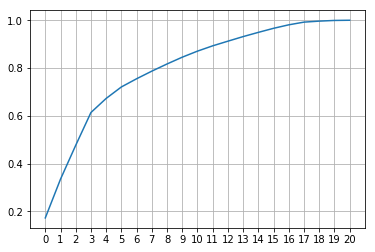

In [154]:
plt.plot(col_imp_score['cum_score'])
ax = plt.axes()
ax.set_xticks(range(21))
plt.grid()
plt.show()

In [ ]:
#So build random forest using only 12 columns

In [155]:
imp_cols = col_imp_score.loc[col_imp_score['cum_score']<.90,'Columns']

In [156]:
imp_cols

0     customer service calls_>3
1              total day charge
2             total day minutes
3        international plan_yes
4              total eve charge
5             total eve minutes
6             total intl charge
7            total intl minutes
8              total intl calls
9           total night minutes
10        number vmail messages
11           total night charge
Name: Columns, dtype: object

In [157]:
X_train_imp = X_train[imp_cols]

In [158]:
X_test_imp = X_test[imp_cols]

In [159]:
rf6 = RandomForestClassifier(n_estimators = 100,max_features = 5, max_depth = 5, class_weight = {0:1,1:20})

In [162]:
rf6 = rf6.fit(X_train_imp,y_train)

In [163]:
rf6_pred_test = rf6.predict(X_test_imp)

In [164]:
rf6_pred_train = rf6.predict(X_train_imp)

In [165]:
confusion_matrix(y_test,rf6_pred_test)

array([[587, 124],
       [ 21, 102]], dtype=int64)

In [166]:
102/(102+21)

0.8292682926829268

In [167]:
confusion_matrix(y_train,rf6_pred_train)

array([[1814,  325],
       [  34,  326]], dtype=int64)

In [168]:
326/(326+34)

0.9055555555555556